In [80]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from statistics import *
import heartpy as hp
import copy
from IPython.display import display
pd.options.display.max_rows = 450

import pwv
import importlib
importlib.reload(pwv)

<module 'pwv' from '/home/anrath/projects/research/josie/PWV/full_demo/pwv.py'>

# Parameters

In [81]:
# List of Booleans. If True, returns a matplotlib plot of corresponding data. Bool 1 = unfiltered waveform. Bool 2 = filtered waveform. Bool 3 = segmented waveform.
preprocess_returnPlot = [True, True, True]
# Index of patient whose data will be shown in plots
preprocess_patPlotShow = 0
preprocess_plotID_patient = 0
preprocess_plotID_segment = 0

# Preprocessing

In [82]:
waveformData, segmentIndices, plots = pwv.preprocess("./mod_data", returnPlot=preprocess_returnPlot, patPlotShow=preprocess_patPlotShow)

/home/anrath/miniconda3/envs/biopeaks/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/anrath/miniconda3/envs/biopeaks/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/anrath/miniconda3/envs/biopeaks/lib/python3.7/site-packages/numpy/ma/core.py:5244: RuntimeWarning: Mean of empty slice.
  dtype=dtype, **kwargs)[()]
/home/anrath/miniconda3/envs/biopeaks/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/home/anrath/miniconda3/envs/biopeaks/lib/python3.7/site-packages/numpy/ma/core.py:5244: RuntimeWarning: Mean of empty slice.
  dtype=dtype, **kwargs)[()]
/home/anrath/miniconda3/envs/biopeaks/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Filtering Waveforms

### Raw Waveforms

In [83]:
plots[0]

<IPython.core.display.Javascript object>

We can filter the waveform using highpass and lowpass Butterworth filters to get a smoother wave.

In [84]:
plots[1]

<IPython.core.display.Javascript object>

## Segmentation of Waveforms
Below is the filtered waveform for the selected patient. We will examine the first 4000 values.

In [85]:
plots[2]

<IPython.core.display.Javascript object>

We can segment this waveform into each individual pulsewave.

In [86]:
plots[3]

<IPython.core.display.Javascript object>

We can also plot inidivdual segments.

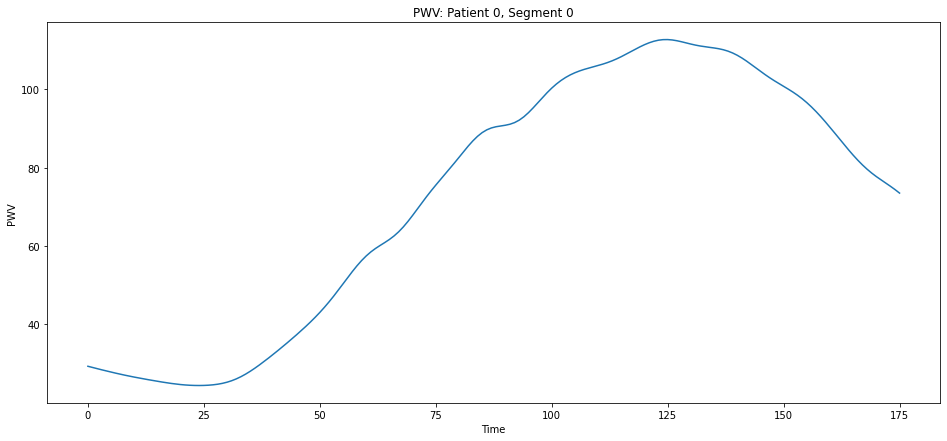

In [87]:
%matplotlib inline

plots = pwv.plotSegment(waveformData, segmentIndices)
plots.iloc[preprocess_plotID_patient, preprocess_plotID_segment]

In [88]:
%matplotlib notebook

plots, points, mets = pwv.interPlotSegment(waveformData, segmentIndices)
print(mets)
plots.iloc[preprocess_plotID_patient, preprocess_plotID_segment]

<IPython.core.display.Javascript object>

[12765.712885896204, 62.291823034221466, 7786.477879277683, 125, 98.11453313879491, 50, 4905.726656939745, 69.5945347753904, 0.49201371967423996, 10299.991146757779, 148, 109.28318554261281, 10.494629828711325, 2513.513267480095, 23, -1.2374097920949225, -40.926060559317335, -48.22877230048627, -12.406062195912824, -1.0612910855618527, 27, 88.600495905913, 8.357386345761256, -40.926060559317335]


<IPython.core.display.Javascript object>

# Metric Calculation

In [89]:
metrics = pwv.analyzeWave(waveformData, segmentIndices)

In [90]:
metrics

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,12765.712886,62.291823,7786.477879,125.0,98.114533,50.0,4905.726657,69.594535,0.492014,...,23.0,-1.237410,-40.926061,-48.228772,-12.406062,-1.061291,27.0,88.600496,8.357386,-40.926061
1,0.0,9815.138604,NaN,0.000000,0.0,53.795319,182.0,9790.748111,65.269221,-0.490349,...,21.0,2.914906,2.914906,NaN,-8.558996,-0.234987,161.0,52.298723,0.130881,2.914906
2,0.0,12907.124214,59.925567,7970.100396,133.0,97.341354,50.0,4867.067675,68.142835,0.431795,...,29.0,-2.466512,-40.152603,-48.369871,-10.954084,-1.151769,21.0,85.620420,14.152149,-40.152603
3,0.0,8733.430321,NaN,0.000000,0.0,47.893722,182.0,8716.657458,60.324701,-0.543210,...,27.0,5.762685,5.762685,NaN,-6.668294,-0.243121,155.0,45.728326,0.105401,5.762685
4,0.0,11782.760097,53.938836,7065.987571,131.0,86.231180,54.0,4656.483707,57.543236,0.574858,...,11.0,0.877349,-42.047779,-45.652179,-13.359836,-0.881672,43.0,82.589109,1.390291,-42.047779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,21.0,530.580833,-8.558890,-804.535665,94.0,7.835739,175.0,1371.254268,10.514603,0.272033,...,62.0,34.498655,5.580779,-13.492714,2.901914,-0.315154,113.0,-9.500526,5.459209,5.580779
543,21.0,2376.567801,-3.707085,-352.173065,95.0,15.776071,175.0,2760.812432,17.526893,0.255116,...,63.0,36.093942,4.074452,-17.159526,2.323630,-0.318728,112.0,-3.219730,9.826421,4.074452
544,21.0,2766.587980,-3.378540,-317.582764,94.0,17.704056,176.0,3115.913843,19.591600,0.211526,...,62.0,40.342596,5.516900,-17.453240,3.629356,-0.284579,114.0,-2.262794,13.375832,5.516900
545,21.0,3559.495542,-4.665715,-443.242881,95.0,22.500080,179.0,4027.514368,19.738161,0.219967,...,68.0,34.967687,0.874038,-23.529837,3.635957,-0.258888,111.0,3.305868,14.903524,0.874038


# Machine Learning

In [91]:
outcomes = [4, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 4, 2, 4, 2, 4, 3, 3, 3]

metrics['25'] = metrics.apply(lambda row: outcomes[int(row[0])], axis=1)
metrics = metrics.dropna()
metrics

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,12765.712886,62.291823,7786.477879,125.0,98.114533,50.0,4905.726657,69.594535,0.492014,...,-1.237410,-40.926061,-48.228772,-12.406062,-1.061291,27.0,88.600496,8.357386,-40.926061,4
2,0.0,12907.124214,59.925567,7970.100396,133.0,97.341354,50.0,4867.067675,68.142835,0.431795,...,-2.466512,-40.152603,-48.369871,-10.954084,-1.151769,21.0,85.620420,14.152149,-40.152603,4
4,0.0,11782.760097,53.938836,7065.987571,131.0,86.231180,54.0,4656.483707,57.543236,0.574858,...,0.877349,-42.047779,-45.652179,-13.359836,-0.881672,43.0,82.589109,1.390291,-42.047779,4
6,0.0,11366.264049,51.653930,6560.049148,127.0,76.766573,62.0,4759.527538,59.149132,0.443683,...,-0.865736,-31.571883,-39.067084,-13.954441,-1.039053,31.0,63.677868,11.823013,-31.571883,4
8,0.0,8272.679246,33.801975,3853.425200,114.0,60.980465,72.0,4390.593494,43.717744,0.410428,...,11.098374,-17.886179,-27.801948,-0.623458,-0.998547,33.0,47.127391,-0.008673,-17.886179,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,21.0,530.580833,-8.558890,-804.535665,94.0,7.835739,175.0,1371.254268,10.514603,0.272033,...,34.498655,5.580779,-13.492714,2.901914,-0.315154,113.0,-9.500526,5.459209,5.580779,3
543,21.0,2376.567801,-3.707085,-352.173065,95.0,15.776071,175.0,2760.812432,17.526893,0.255116,...,36.093942,4.074452,-17.159526,2.323630,-0.318728,112.0,-3.219730,9.826421,4.074452,3
544,21.0,2766.587980,-3.378540,-317.582764,94.0,17.704056,176.0,3115.913843,19.591600,0.211526,...,40.342596,5.516900,-17.453240,3.629356,-0.284579,114.0,-2.262794,13.375832,5.516900,3
545,21.0,3559.495542,-4.665715,-443.242881,95.0,22.500080,179.0,4027.514368,19.738161,0.219967,...,34.967687,0.874038,-23.529837,3.635957,-0.258888,111.0,3.305868,14.903524,0.874038,3


In [92]:
x_train, x_test, y_train, y_test = pwv.MLSplit(metrics)

np.where(metrics.values >= np.finfo(np.float32).max)

(array([], dtype=int64), array([], dtype=int64))

In [93]:
z, accuracy, precision, recall = pwv.logistic(x_train, x_test, y_train, y_test)
print(z)
print("Accuracy:", accuracy) # metrics.accuracy_score(y_test, y_pred)
print("Precision:", precision) # metrics.precision_score(y_test, y_pred)
print("Recall:", recall) # metrics.recall_score(y_test, y_pred)

/home/anrath/miniconda3/envs/biopeaks/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
z, accuracy, precision, recall = pwv.decisionTree(x_train, x_test, y_train, y_test)
print(z)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

     True  Prediction
0       1           1
1       1           1
2       1           1
3       1           1
4       1           0
..    ...         ...
893     1           1
894     1           1
895     1           1
896     1           1
897     1           1

[898 rows x 2 columns]
Accuracy: 0.7850779510022272
Precision: 0.8558282208588958
Recall: 0.8493150684931506


In [ ]:
z, accuracy, precision, recall = pwv.sv(x_train, x_test, y_train, y_test)
print(z)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
z, accuracy, precision, recall = pwv.KNeighbors(x_train, x_test, y_train, y_test)
print(z)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
z, accuracy, precision, recall = pwv.gaussianNB(x_train, x_test, y_train, y_test)
print(z)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

     True  Prediction
0       1           0
1       1           0
2       1           0
3       1           0
4       1           0
..    ...         ...
893     1           0
894     1           0
895     1           0
896     1           0
897     1           0

[898 rows x 2 columns]
Accuracy: 0.28619153674832964
Precision: 0.9
Recall: 0.0273972602739726
